# Sumber
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

Membaca Dataset dan menampilkan seluruh data

In [2]:
#load dataset
import pandas as pd
import numpy as np

df = pd.read_csv('Kelompok4_DatasetUAS.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


Memilih data FuelConsumption_city dan CO2 Emissions, untuk membandingkan konsumsi bahan bakar yang penggunaan di kota dengan banyaknya Emisi CO2 yang dikeluarkan

In [6]:
df = pd.read_csv('Kelompok4_DatasetUAS.csv', usecols = ['FUELCONSUMPTION_CITY','CO2EMISSIONS'])
df

,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,9.9,196
1,11.2,221
2,6.0,136
3,12.7,255
4,12.1,244
...,...,...
1062,13.4,271
1063,13.2,264
1064,13.4,271
1065,12.9,260


In [7]:
#Melihat informasi data yang akan digunakan apakah data memiliki nilai Null atau tidak atas 2 Data yang dipilih

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FUELCONSUMPTION_CITY  1067 non-null   float64
 1   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


In [8]:
#Melihat statistical description
df.describe()

,FUELCONSUMPTION_CITY,CO2EMISSIONS
count,1067.000000,1067.000000
mean,13.296532,256.228679
std,4.101253,63.372304
min,4.600000,108.000000
25%,10.250000,207.000000
50%,12.600000,251.000000
75%,15.550000,294.000000
max,30.200000,488.000000


In [9]:
#Mencari dan menangani missing values
#Ternyata data kira tidak ada missing values
df.isnull().sum()

FUELCONSUMPTION_CITY    0
CO2EMISSIONS            0
dtype: int64

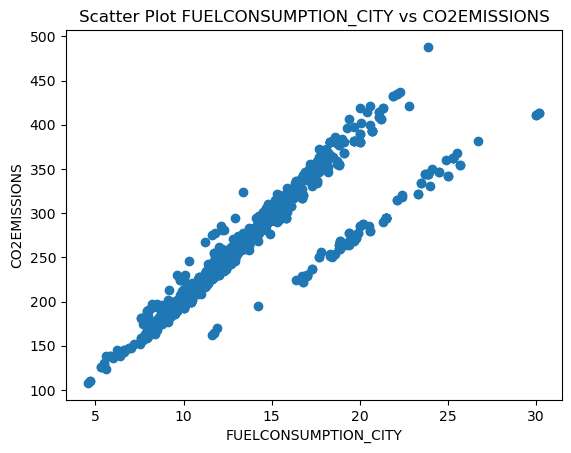

In [10]:
#Bivariate analysis FUELCONSUMPTION_CITY dan CO2EMISSIONS
#Menggunakan scatter plot

import matplotlib.pyplot as plt
plt.scatter(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'])
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.title('Scatter Plot FUELCONSUMPTION_CITY vs CO2EMISSIONS')
plt.show()

In [11]:
#Mengetahui nilai korelasi dari FUELCONSUMPTION_CITY dan CO2EMISSIONS
df.corr()

,FUELCONSUMPTION_CITY,CO2EMISSIONS
FUELCONSUMPTION_CITY,1.000000,0.898039
CO2EMISSIONS,0.898039,1.000000


In [12]:
#buat variable x dan y
x = df['FUELCONSUMPTION_CITY'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values.reshape(-1,1)

In [13]:
#kita split data kita menjadi training and testing dengan porsi 80:20
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [14]:
x_train.shape

(853, 1)

In [15]:
y_train.shape

(853, 1)

In [16]:
#Membuat object (variale) linear regresi
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [17]:
# train the model menggunakan training data yang sudah displit
lin_reg.fit (x_train, y_train)

LinearRegression()

In [18]:
#testing (Predict Result)
y_prediksi = lin_reg.predict(x_test)
y_prediksi

array([[309.80120336],
       [218.11687335],
       [230.43267887],
       [220.85371902],
       [186.64314813],
       [279.69590097],
       [219.48529619],
       [260.53798126],
       [214.01160484],
       [301.59066634],
       [290.64328365],
       [379.59076799],
       [208.5379135 ],
       [271.48536395],
       [198.95895365],
       [259.16955843],
       [363.16969396],
       [226.32741037],
       [252.32744425],
       [330.32754589],
       [205.80106783],
       [193.4852623 ],
       [241.38006156],
       [230.43267887],
       [149.69573156],
       [267.38009544],
       [261.9064041 ],
       [368.6433853 ],
       [242.7484844 ],
       [138.74834887],
       [319.38016321],
       [237.27479305],
       [307.06435768],
       [237.27479305],
       [205.80106783],
       [201.69579932],
       [290.64328365],
       [227.6958332 ],
       [234.53794738],
       [244.11690723],
       [201.69579932],
       [194.85368514],
       [218.11687335],
       [186

In [19]:
y_prediksi.shape

(214, 1)

In [20]:
# kita cari tahu acuracy score dari model

lin_reg.score(x_test, y_test)

0.8335942847774922

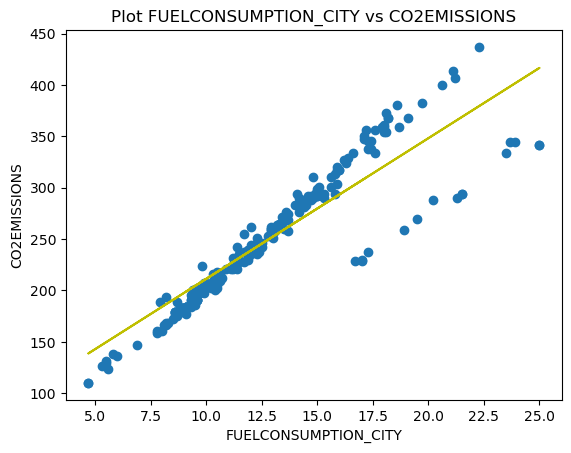

In [21]:
# Visualisasi aktual vs prediksi menggunakan data testing
#Garis merah menggunakan garis regresi dari persamaan yang kita dapat tadi

y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='y')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.title('Plot FUELCONSUMPTION_CITY vs CO2EMISSIONS')
plt.show()

In [22]:
# Prediksi harga mobil dengan FUELCONSUMPTION_CITY 30.0

lin_reg.predict([[30.0]])

array([[484.95932635]])

In [23]:
# Prediksi harga mobil dengan FUELCONSUMPTION_CITY 11.0

lin_reg.predict([[11.0]])

array([[224.95898753]])